In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pyro
import pyro.distributions as dist
from time_depend import model,guide

/opt/anaconda3/envs/dmm_pyro/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
def data_generator(length,cp,inc1,inc2):
    data = []
    mean = 0.0
    for i in range(length):
        if i < cp:
            data.append(np.random.normal(mean,0.01))
            mean += inc1
        else:
            data.append(np.random.normal(mean,0.01))
            mean += inc2
    return data

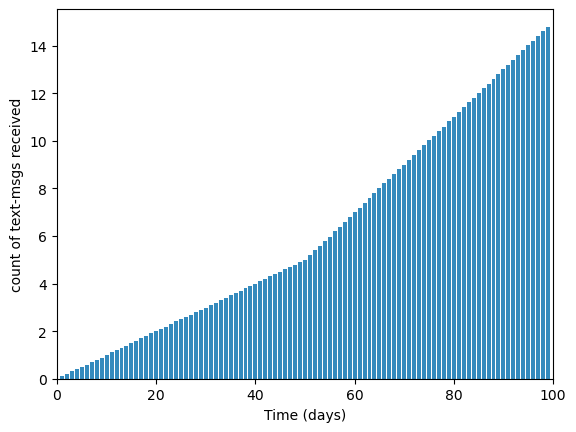

In [12]:
from plot import plot
data1=data_generator(100,50,0.1,0.2)
plot(data1)

In [13]:
adam = pyro.optim.Adam({"lr": 0.02}) 
elbo = pyro.infer.Trace_ELBO()
svi = pyro.infer.SVI(model, guide, adam, elbo)

In [14]:
from scipy.special import softmax
losses=[]
probs=[]
for step in range(100):  # Consider running for more steps.
    loss = svi.step(torch.tensor(data1))
    losses.append(loss)
    pi= pyro.param("pi").data.cpu().numpy()
    prob=softmax(pi)
    probs.append(prob)
        

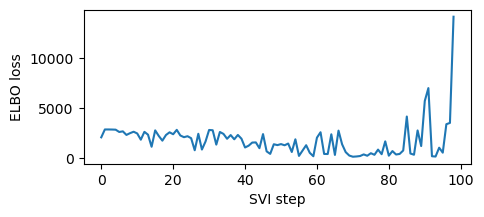

In [16]:
plt.figure(figsize=(5, 2))
plt.plot(losses[0:99])
plt.xlabel("SVI step")
#plt.ylim([0,100])
plt.ylabel("ELBO loss");

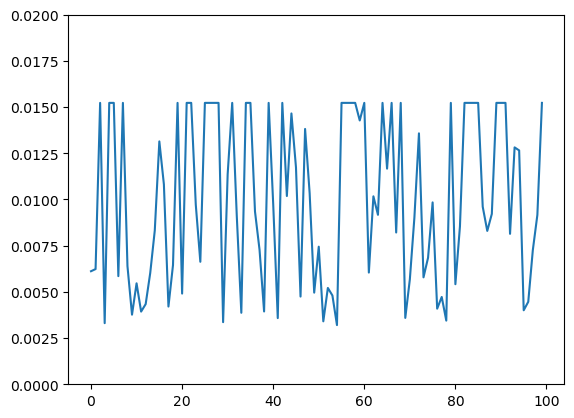

In [28]:
import matplotlib.pyplot as plt
plt.ylim(0.0,0.02)
plt.plot(probs[90])
plt.show()